In [1]:
import pandas as pd
from ifanalysis import counts
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/Test_Data_long.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438981 entries, 0 to 449
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   experiment                   438981 non-null  object 
 1   plate_id                     438981 non-null  int64  
 2   well                         438981 non-null  object 
 3   well_id                      438981 non-null  int64  
 4   image_id                     438981 non-null  int64  
 5   cell_line                    438981 non-null  object 
 6   condition                    438981 non-null  object 
 7   label                        438981 non-null  float64
 8   area_nucleus                 438981 non-null  float64
 9   intensity_max_DAPI_nucleus   438981 non-null  float64
 10  intensity_min_DAPI_nucleus   438981 non-null  float64
 11  intensity_mean_DAPI_nucleus  438981 non-null  float64
 12  Cyto_ID                      438981 non-null  float64
 13  in

In [25]:
def sample_df(df, sample_n):
    """Takes random selection for each condition in df"""
    grouped = df.groupby("condition")
    sampled_df = pd.DataFrame()
    for group_name, group_df in grouped:
        if len(group_df) >= sample_n:
            sampled_rows = group_df.sample(n=min(sample_n, len(group_df)), random_state=42)
        else:
            sampled_rows = group_df
        sampled_df = pd.concat([sampled_df, sampled_rows])
    sampled_df.reset_index(drop=True, inplace=True)
    return sampled_df

df1 = sample_df(df, 3000)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   experiment                   48000 non-null  object 
 1   plate_id                     48000 non-null  int64  
 2   well                         48000 non-null  object 
 3   well_id                      48000 non-null  int64  
 4   image_id                     48000 non-null  int64  
 5   cell_line                    48000 non-null  object 
 6   condition                    48000 non-null  object 
 7   label                        48000 non-null  float64
 8   area_nucleus                 48000 non-null  float64
 9   intensity_max_DAPI_nucleus   48000 non-null  float64
 10  intensity_min_DAPI_nucleus   48000 non-null  float64
 11  intensity_mean_DAPI_nucleus  48000 non-null  float64
 12  Cyto_ID                      48000 non-null  float64
 13  integrated_int_D

In [26]:
from ifanalysis import normalisation
df_cc = normalisation.cellcycle_analysis(df1)


In [27]:
df_cc.columns

Index(['experiment', 'well', 'cell_line', 'condition', 'plate_id', 'well_id',
       'image_id', 'label', 'area_nucleus', 'intensity_max_DAPI_nucleus',
       'intensity_min_DAPI_nucleus', 'intensity_mean_DAPI_nucleus', 'Cyto_ID',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_min_DAPI_cell', 'intensity_mean_DAPI_cell', 'area_cyto',
       'intensity_max_DAPI_cyto', 'intensity_min_DAPI_cyto',
       'intensity_mean_DAPI_cyto', 'intensity_max_Tub_nucleus',
       'intensity_min_Tub_nucleus', 'intensity_mean_Tub_nucleus',
       'intensity_max_Tub_cell', 'intensity_min_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_min_Tub_cyto', 'intensity_mean_Tub_cyto',
       'intensity_max_H3P_nucleus', 'intensity_min_H3P_nucleus',
       'intensity_mean_H3P_nucleus', 'intensity_max_H3P_cell',
       'intensity_min_H3P_cell', 'intensity_mean_H3P_cell',
       'intensity_max_H3P_cyto', 'intensity_min_H3P_cyto',
       

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot using jointplot
g = sns.jointplot(data=df_cc, x="integrated_int_DAPI_norm", y='intensity_mean_EdU_nucleus_norm', log_scale=(True, True), kind='scatter')

# Overlay the heat map using histplot
sns.histplot(data=df_cc, x="integrated_int_DAPI_norm", y='intensity_mean_EdU_nucleus_norm', bins='auto', cbar=True, cmap='YlOrRd', ax=g.ax_joint)

plt.show()


/Users/hh65/.pyenv/versions/3.11.0/envs/data-analysis/lib/python3.11/site-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


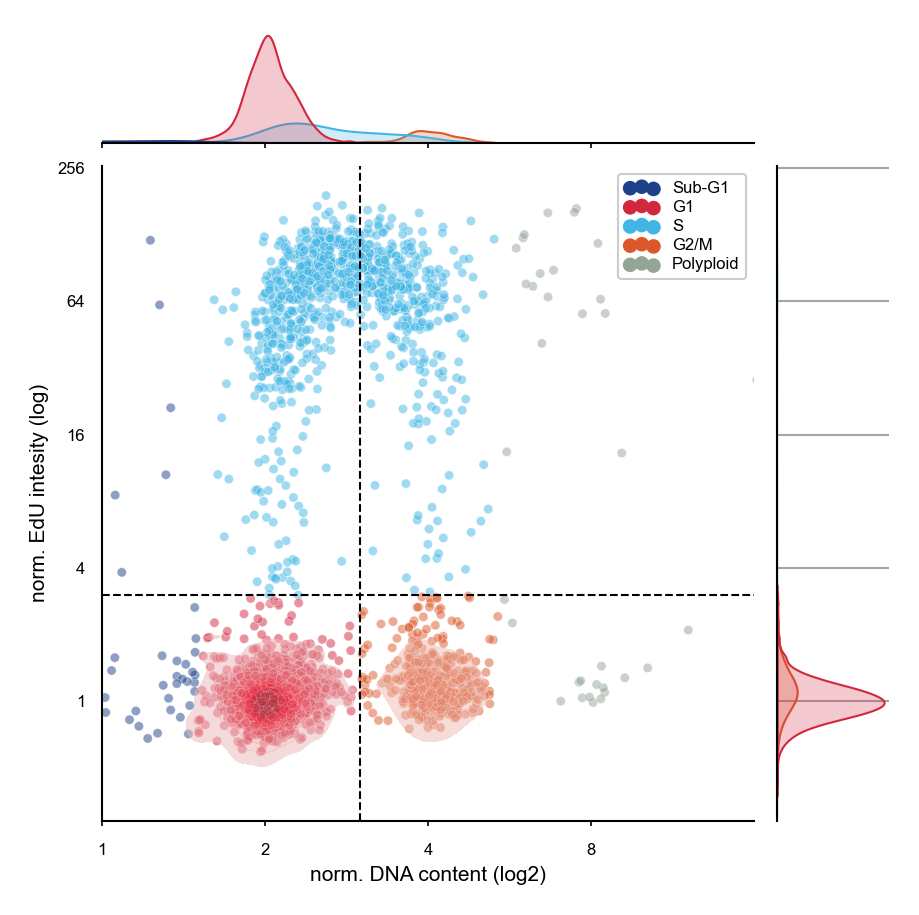

In [58]:
import matplotlib.ticker as ticker

#fig, ax = plt.subplots(figsize=(10, 10))
g = sns.jointplot(
    data=df_cc[df_cc['condition'] == 'SCR'], 
    x="integrated_int_DAPI_norm", 
    y='intensity_mean_EdU_nucleus_norm', 
    hue='cell_cycle', 
    s=20,
    alpha=0.5,
    
    )
g.plot_joint(sns.kdeplot, fill=True, cmap='YlOrRd', alpha=0.5)
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log', base=2)
g.ax_joint.grid(False)
g.ax_joint.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x))))
g.ax_joint.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x))))
g.ax_joint.set_xticks([1, 2, 4, 8])
g.ax_joint.set_xlim([1, 16])
g.ax_joint.legend(loc='upper right')
g.ax_joint.set_xlabel("norm. DNA content (log2)")
g.ax_joint.set_ylabel("norm. EdU intesity (log)")
g.ax_joint.axvline(x=3, color='black', linestyle='--')
g.ax_joint.axhline(y=3, color='black', linestyle='--')


<Axes: xlabel='norm. DNA content (log2)', ylabel='norm. EdU intesity (log)'>

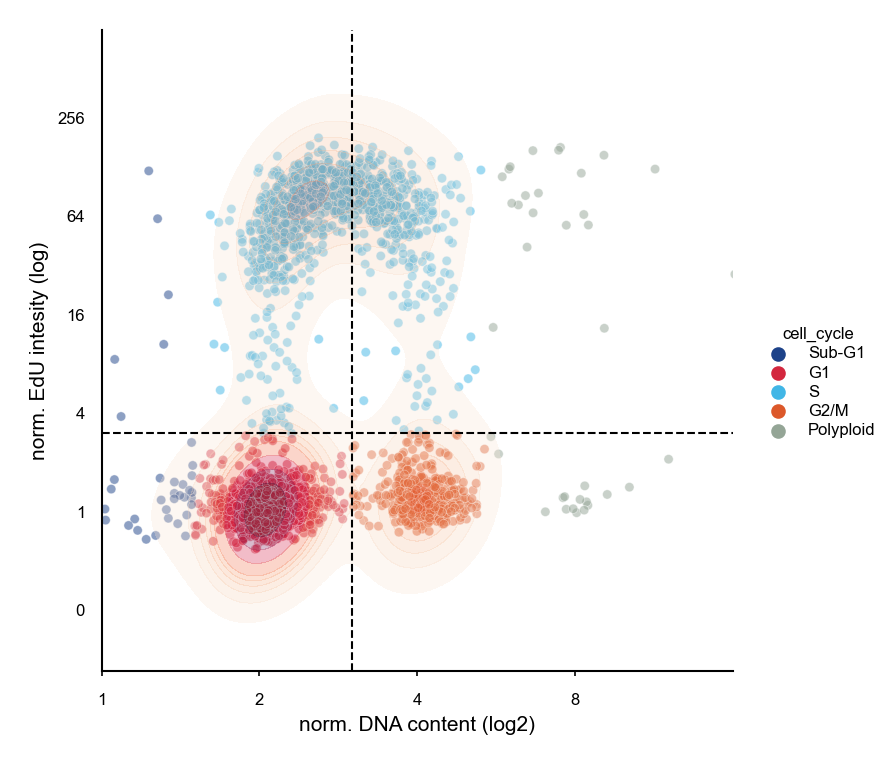

In [76]:

import matplotlib.ticker as ticker

#fig, ax = plt.subplots(figsize=(10, 10))
g = sns.relplot(
    data=df_cc[df_cc['condition'] == 'SCR'], 
    x="integrated_int_DAPI_norm", 
    y='intensity_mean_EdU_nucleus_norm', 
    hue='cell_cycle', 
    s=20,
    alpha=0.5,
    kind='scatter'
    )

g.ax.set_xscale('log')
g.ax.set_yscale('log', base=2)
g.ax.grid(False)
g.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x))))
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x))))
g.ax.set_xticks([1, 2, 4, 8])
g.ax.set_xlim([1, 16])
# g.ax.legend(loc='upper right')
g.ax.set_xlabel("norm. DNA content (log2)")
g.ax.set_ylabel("norm. EdU intesity (log)")
g.ax.axvline(x=3, color='black', linestyle='--')
g.ax.axhline(y=3, color='black', linestyle='--')
sns.kdeplot(
    data=df_cc[df_cc['condition'] == 'SCR'], 
    x="integrated_int_DAPI_norm", 
    y='intensity_mean_EdU_nucleus_norm', 
    fill=True,
    alpha=0.3,
    cmap='rocket_r', 
    ax=g.ax
)



<Axes: xlabel='norm. DNA content (log2)', ylabel='norm. EdU intesity (log)'>

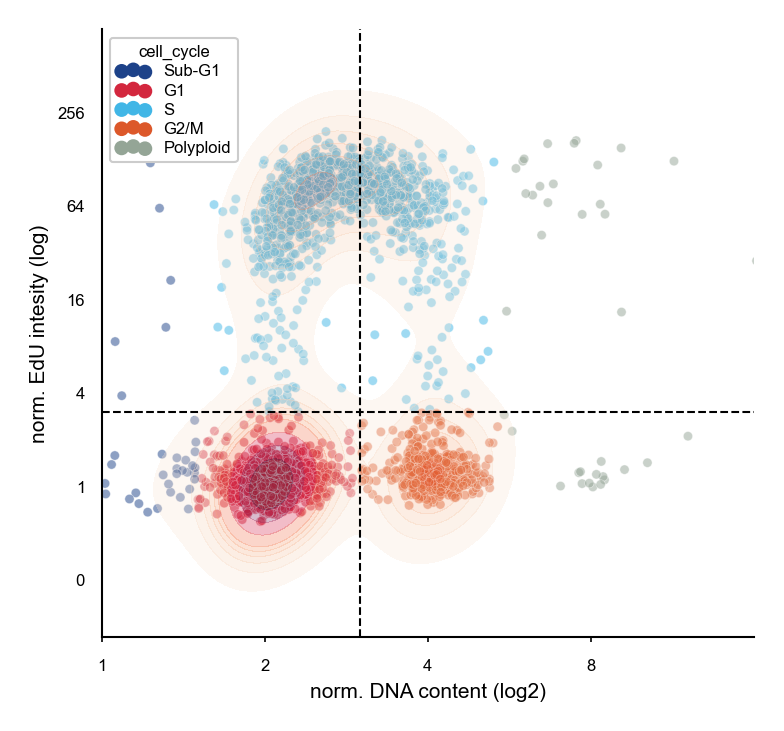

In [75]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(5, 5))
#fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    data=df_cc[df_cc['condition'] == 'SCR'], 
    x="integrated_int_DAPI_norm", 
    y='intensity_mean_EdU_nucleus_norm', 
    hue='cell_cycle', 
    s=20,
    alpha=0.5,
    ax=ax)

ax.set_xscale('log')
ax.set_yscale('log', base=2)
ax.grid(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x))))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x))))
ax.set_xticks([1, 2, 4, 8])
ax.set_xlim([1, 16])
# g.ax.legend(loc='upper right')
ax.set_xlabel("norm. DNA content (log2)")
ax.set_ylabel("norm. EdU intesity (log)")
ax.axvline(x=3, color='black', linestyle='--')
ax.axhline(y=3, color='black', linestyle='--')
sns.kdeplot(
    data=df_cc[df_cc['condition'] == 'SCR'], 
    x="integrated_int_DAPI_norm", 
    y='intensity_mean_EdU_nucleus_norm', 
    fill=True,
    alpha=0.3,
    cmap='rocket_r', 
    ax=ax
)

In [183]:
from matplotlib.gridspec import GridSpec
import math

phases = phases = ["Sub-G1", "G1", "S", "G2/M", "Polyploid"]
def plot_histogram(ax, i, data):
    sns.histplot(data=data, x="integrated_int_DAPI_norm", ax=ax)
    ax.set_xlabel(None)
    ax.set_xscale("log", base=2)
    ax.set_xlim([1, 16])
    ax.xaxis.set_visible(False)   
    if i == 0:
        ax.set_ylabel("Frequency")
    else:
        ax.yaxis.set_visible(False)

def plot_scatter(ax, i, data, conditions):
    sns.scatterplot(
        data=data, 
        x="integrated_int_DAPI_norm", 
        y='intensity_mean_EdU_nucleus_norm', 
        hue='cell_cycle',
        hue_order=phases, 
        s=5,
        alpha=0.5,
        ax=ax)
    ax.set_xscale('log')
    ax.set_yscale('log', base=2)
    ax.grid(False)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x))))
    ax.set_xticks([1, 2, 4, 8])
    ax.set_xlim([1, 16])
    ax.set_xlabel("norm. DNA content (log2)")
    if i == len(conditions):
        ax.set_ylabel("norm. EdU intesity (log)")
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x))))
        ax.legend(loc='upper right')
    else:
        ax.yaxis.set_visible(False)
        ax.legend().remove()
    ax.axvline(x=3, color='black', linestyle='--')
    ax.axhline(y=3, color='black', linestyle='--')
    sns.kdeplot(
        data=df_cc[df_cc['condition'] == 'SCR'], 
        x="integrated_int_DAPI_norm", 
        y='intensity_mean_EdU_nucleus_norm', 
        fill=True,
        alpha=0.3,
        cmap='rocket_r', 
        ax=ax
)
   

def cellcycleplot_comb(df, conditions, cell_line):
    col_number = len(conditions)
    df1 = df[df_cc.cell_line == cell_line]
    condition_list = conditions * 2

    fig = plt.figure(figsize=(3 * len(conditions), 5))
    gs = GridSpec(2, col_number, height_ratios=[1, 3])
    ax_list = [(i, j) for i in range(2) for j in range(col_number)]
    # y_max = df_cc[col].quantile(0.99) * 1.5
    # y_min = df_cc[col].quantile(0.01) * 0.8

    for i, pos in enumerate(ax_list):
        data = df1[df1.condition == condition_list[i]]
        ax = fig.add_subplot(gs[pos[0], pos[1]])

        if i < len(conditions):
            plot_histogram(ax, i, data)
            ax.set_title(condition_list[i])
        else:
            print(condition_list[i])
            plot_scatter(ax, i, data, conditions)

        ax.grid(visible=False)

    plt.tight_layout()
 
    

SCR
NT


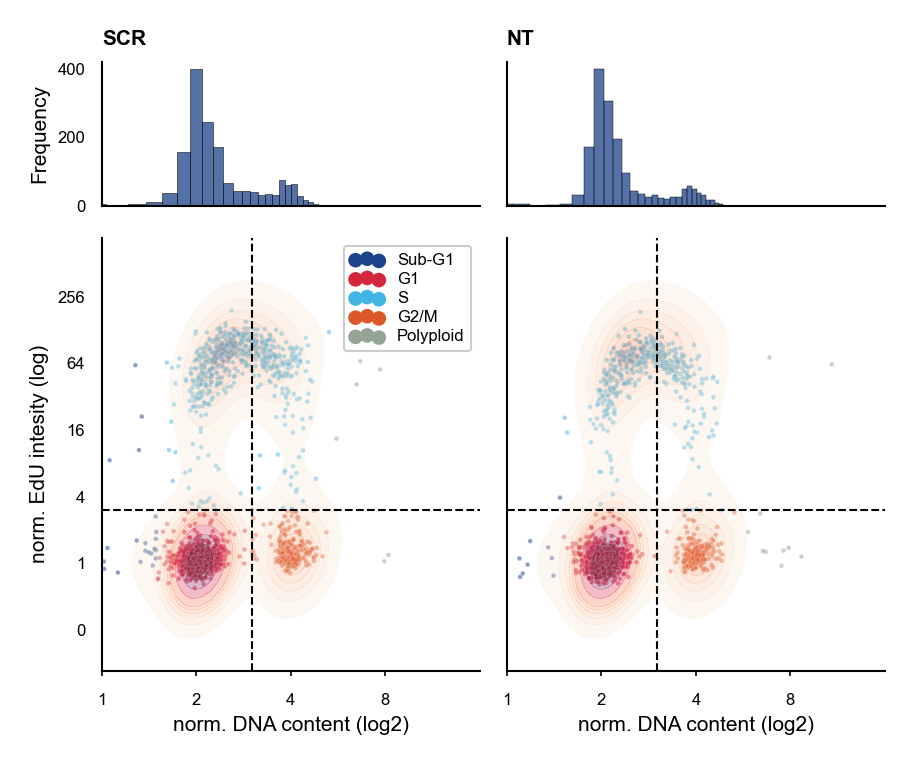

In [184]:
conditions = ['SCR', 'NT']
cellcycleplot_comb(df_cc, conditions, 'U2OS')
